In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium as fo
from folium.plugins import HeatMap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, roc_curve, auc,roc_auc_score, mean_squared_error
import sklearn.model_selection
import sklearn.tree
from sklearn.tree import DecisionTreeRegressor
import sklearn.ensemble 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
df1 = pd.read_csv("newvehiclesv2.csv")

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105789 entries, 0 to 105788
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            105789 non-null  int64  
 1   price         105789 non-null  int64  
 2   year          105789 non-null  float64
 3   manufacturer  105789 non-null  object 
 4   model         105789 non-null  object 
 5   condition     105789 non-null  object 
 6   cylinders     105789 non-null  object 
 7   fuel          105789 non-null  object 
 8   odometer      105789 non-null  float64
 9   title_status  105789 non-null  object 
 10  transmission  105789 non-null  object 
 11  drive         105789 non-null  object 
 12  type          105789 non-null  object 
 13  paint_color   105789 non-null  object 
 14  state         105789 non-null  object 
 15  lat           105789 non-null  float64
 16  long          105789 non-null  float64
 17  posting_date  105789 non-null  object 
 18  make

# Cleaning the original file

In [ ]:
df = pd.read_csv("vehicles.csv")

In [ ]:
df.shape

(426880, 26)

In [ ]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [ ]:
#Drop unnecessary attributes and attributes with too many NAs
drop = ['url','region_url','VIN', 'image_url','region','description','size', 'county']
df.drop(columns = drop, inplace=True)

In [ ]:
df.head(5)

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date
0,7222695916,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


Text(0.5, 1.0, 'Price Range')

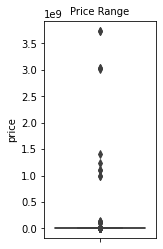

In [ ]:
#Check outlier
plt.figure(figsize=(2,4))
sns.boxplot(y = "price", data=df)
plt.title('Price Range',fontsize = 10)

Text(0.5, 1.0, 'Mileage Range')

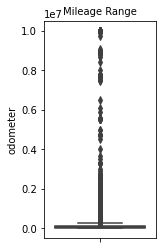

In [ ]:
#Check outlier
plt.figure(figsize=(2,4))
sns.boxplot(y = "odometer", data=df)
plt.title('Mileage Range',fontsize = 10)

In [ ]:
#Clean outlier, and drop all NAs since we don't have the computation power to deal with such a huge dataset.
df = df[(df['odometer'] >= 500) & (df['odometer'] <= 500000)]
df = df[(df['price'] >= 1000) & (df['price'] <= 75000)]
df = df.dropna()

## Data Inspection

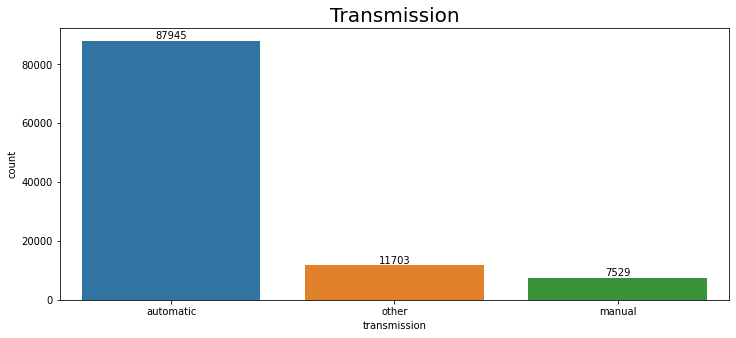

In [ ]:
plt.figure(figsize = (12,5))
transmission = sns.countplot(x ='transmission',data = df,order = df.transmission.value_counts().index)
plt.title('Transmission',fontsize = 20)
for p in transmission.patches:
             transmission.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

Text(0.5, 1.0, 'Price Range')

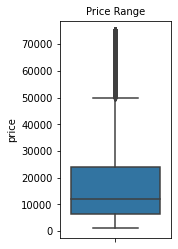

In [ ]:
plt.figure(figsize=(2,4))
sns.boxplot(y = "price", data=df)
plt.title('Price Range',fontsize = 10)

Text(0.5, 1.0, 'Mileage Range')

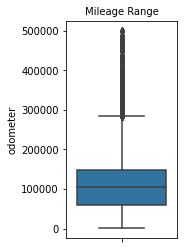

In [ ]:
plt.figure(figsize=(2,4))
sns.boxplot(y = "odometer", data=df)
plt.title('Mileage Range',fontsize = 10)

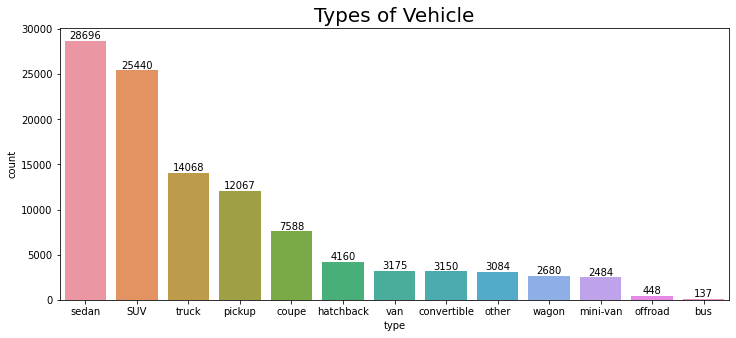

In [ ]:
plt.figure(figsize = (12,5))
types = sns.countplot(x ='type',data = df,order=df.type.value_counts().index)
plt.title('Types of Vehicle', fontsize = 20)
for p in types.patches:
             types.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

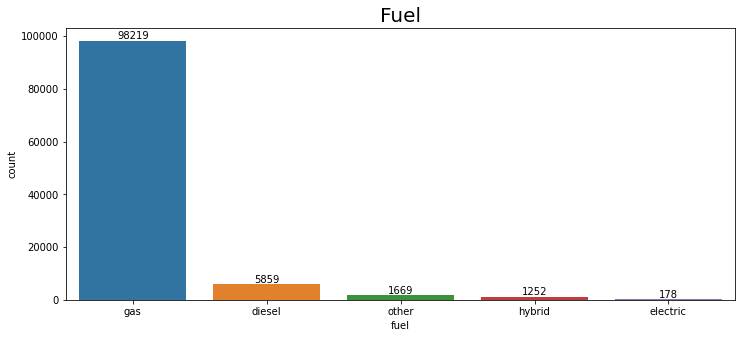

In [ ]:
plt.figure(figsize = (12,5))
transmission = sns.countplot(x ='fuel',data = df,order = df.fuel.value_counts().index)
plt.title('Fuel',fontsize = 20)
for p in transmission.patches:
             transmission.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

In [ ]:
df.loc[df['fuel']=='other'].head(5)

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date
72,7312313815,33990,2017.00000,jeep,wrangler unlimited sahara,good,6 cylinders,other,34152.00000,clean,other,4wd,SUV,white,al,32.59000,-85.48000,2021-04-25T09:41:09-0500
105,7308730136,40590,2019.00000,ford,f250 super duty regular cab,good,8 cylinders,other,9313.00000,clean,other,4wd,pickup,white,al,32.59000,-85.48000,2021-04-18T09:50:48-0500
139,7304685581,32990,2019.00000,jeep,wrangler sport suv 2d,good,6 cylinders,other,1423.00000,clean,other,4wd,SUV,yellow,al,32.59000,-85.48000,2021-04-10T10:31:27-0500
392,7314759358,34990,2018.00000,ram,1500 quad cab big horn,good,6 cylinders,other,22064.00000,clean,other,4wd,pickup,silver,al,33.52000,-86.79000,2021-04-30T08:31:21-0500
511,7313780256,25590,2017.00000,jeep,grand cherokee laredo sport,good,6 cylinders,other,31315.00000,clean,other,4wd,SUV,silver,al,33.52000,-86.79000,2021-04-28T08:41:00-0500


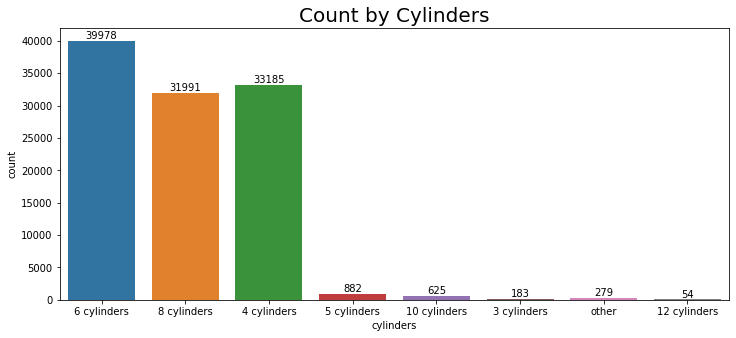

In [ ]:
plt.figure(figsize=(12,5))
cylinders = sns.countplot(data = df, x = "cylinders")
plt.title('Count by Cylinders', fontsize = 20)
for p in cylinders.patches:
             cylinders.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

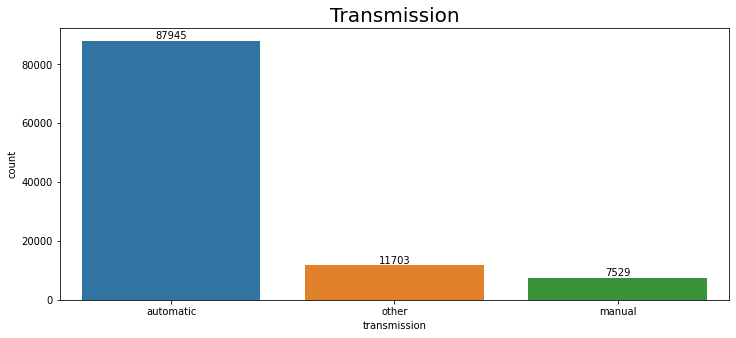

In [ ]:
plt.figure(figsize = (12,5))
transmission = sns.countplot(x ='transmission',data = df,order = df.transmission.value_counts().index)
plt.title('Transmission',fontsize = 20)
for p in transmission.patches:
             transmission.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

In [ ]:
df.loc[df['manufacturer']=='harley-davidson'].count()

id              28
price           28
year            28
manufacturer    28
model           28
condition       28
cylinders       28
fuel            28
odometer        28
title_status    28
transmission    28
drive           28
type            28
paint_color     28
state           28
lat             28
long            28
posting_date    28
dtype: int64

In [ ]:
df.loc[df['transmission']=='other']

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date
32,7316343444,27990,2012.00000,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.00000,clean,other,4wd,pickup,black,al,32.59000,-85.48000,2021-05-03T13:41:25-0500
33,7316304717,34590,2016.00000,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.00000,clean,other,4wd,pickup,silver,al,32.59000,-85.48000,2021-05-03T12:41:33-0500
35,7316257769,29990,2016.00000,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.00000,clean,other,4wd,pickup,red,al,32.59000,-85.48000,2021-05-03T11:31:14-0500
36,7316133914,38590,2011.00000,chevrolet,corvette grand sport,good,8 cylinders,gas,30237.00000,clean,other,rwd,other,red,al,32.59000,-85.48000,2021-05-03T07:50:35-0500
38,7315816316,32990,2017.00000,jeep,wrangler unlimited sport,good,6 cylinders,gas,30041.00000,clean,other,4wd,other,silver,al,32.59000,-85.48000,2021-05-02T12:22:10-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426798,7303006817,44990,2014.00000,chevrolet,corvette stingray,good,8 cylinders,gas,22973.00000,clean,other,rwd,coupe,black,wy,33.78650,-84.44540,2021-04-07T03:10:22-0600
426857,7301954392,41990,2019.00000,toyota,4runner limited sport,good,6 cylinders,gas,36630.00000,clean,other,4wd,SUV,white,wy,33.78650,-84.44540,2021-04-05T04:00:21-0600
426858,7301953587,51990,2020.00000,cadillac,xt6 premium luxury,good,6 cylinders,gas,6814.00000,clean,other,fwd,other,black,wy,33.77921,-84.41181,2021-04-05T03:50:20-0600
426859,7301952155,48590,2020.00000,cadillac,xt6 premium luxury,good,6 cylinders,gas,7701.00000,clean,other,fwd,other,black,wy,33.77921,-84.41181,2021-04-05T03:30:19-0600


In [ ]:
df.loc[df['cylinders']=='other'].count()

id              279
price           279
year            279
manufacturer    279
model           279
condition       279
cylinders       279
fuel            279
odometer        279
title_status    279
transmission    279
drive           279
type            279
paint_color     279
state           279
lat             279
long            279
posting_date    279
dtype: int64

In [ ]:
df.shape

(107177, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107177 entries, 31 to 426878
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            107177 non-null  int64  
 1   price         107177 non-null  int64  
 2   year          107177 non-null  float64
 3   manufacturer  107177 non-null  object 
 4   model         107177 non-null  object 
 5   condition     107177 non-null  object 
 6   cylinders     107177 non-null  object 
 7   fuel          107177 non-null  object 
 8   odometer      107177 non-null  float64
 9   title_status  107177 non-null  object 
 10  transmission  107177 non-null  object 
 11  drive         107177 non-null  object 
 12  type          107177 non-null  object 
 13  paint_color   107177 non-null  object 
 14  state         107177 non-null  object 
 15  lat           107177 non-null  float64
 16  long          107177 non-null  float64
 17  posting_date  107177 non-null  object 
dtypes: 

# Processing the Cleaned Dataset

In [ ]:
df1 = df1[df1['manufacturer'] != 'harley-davidson']
df1 = df1[df1['cylinders'] != 'other']
df1['transmission'] = df1['transmission'].replace(['other'],'automatic')
df1['type'] = df1['type'].replace(['convertible'], 'coupe')
df1['type'] = df1['type'].replace(['offroad'], 'SUV')
df1['type'] = df1['type'].replace(['bus','van','mini-van','wagon'], 'other')
df1['fuel'] = df1['fuel'].replace(['other'], 'gas')

In [ ]:
df1['cylinders'] = df1['cylinders'].str.replace('cylinders', '')
df1["cylinders"] = pd.to_numeric(df1.cylinders, errors='coerce')

In [ ]:
df1['age'] = 2021 - df1['year']

In [ ]:
print(df1.odometer.describe())

count   105497.00000
mean    108497.36685
std      63132.62045
min        500.00000
25%      60000.00000
50%     105722.00000
75%     149357.00000
max     500000.00000
Name: odometer, dtype: float64


In [ ]:
print(df1.price.describe())

count   105497.00000
mean     15545.37233
std      11630.64879
min       1000.00000
25%       6490.00000
50%      11765.00000
75%      22995.00000
max      50000.00000
Name: price, dtype: float64


In [ ]:
df1.shape

(105497, 20)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105497 entries, 0 to 105788
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            105497 non-null  int64  
 1   price         105497 non-null  int64  
 2   year          105497 non-null  float64
 3   manufacturer  105497 non-null  object 
 4   model         105497 non-null  object 
 5   condition     105497 non-null  object 
 6   cylinders     105497 non-null  int64  
 7   fuel          105497 non-null  object 
 8   odometer      105497 non-null  float64
 9   title_status  105497 non-null  object 
 10  transmission  105497 non-null  object 
 11  drive         105497 non-null  object 
 12  type          105497 non-null  object 
 13  paint_color   105497 non-null  object 
 14  state         105497 non-null  object 
 15  lat           105497 non-null  float64
 16  long          105497 non-null  float64
 17  posting_date  105497 non-null  object 
 18  make

# Data Visualization

Text(0.5, 1.0, 'Price Range')

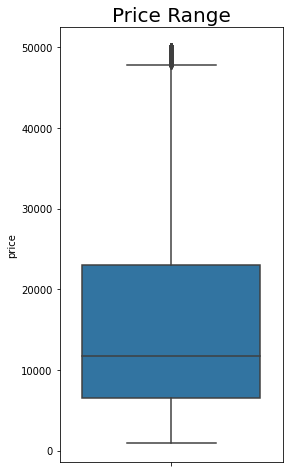

In [ ]:
plt.figure(figsize=(4,8))
sns.boxplot(y = "price", data=df1)
plt.title('Price Range',fontsize = 20)

Text(0.5, 1.0, 'Price Density')

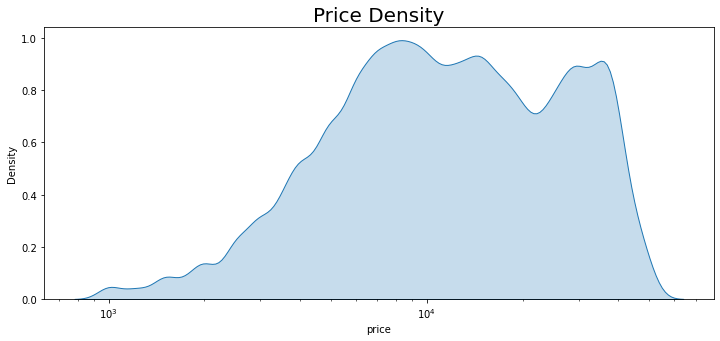

In [ ]:
plt.figure(figsize=(12,5))
sns.kdeplot(data=df1, x="price", shade=True, log_scale=True)
plt.title('Price Density',fontsize = 20)

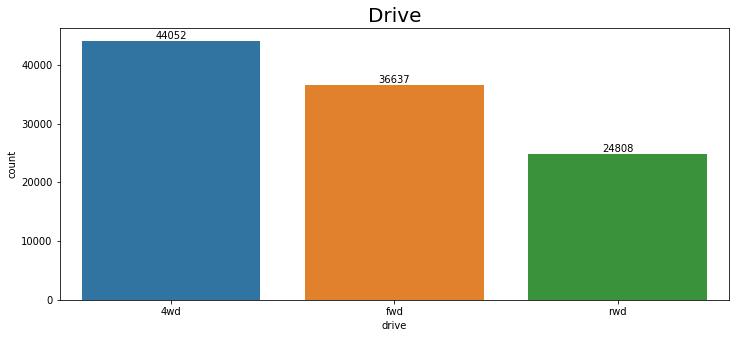

In [ ]:
plt.figure(figsize = (12,5))
drive = sns.countplot(x ='drive',data = df1,order = df1.drive.value_counts().index)
plt.title('Drive',fontsize = 20)
for p in drive.patches:
             drive.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

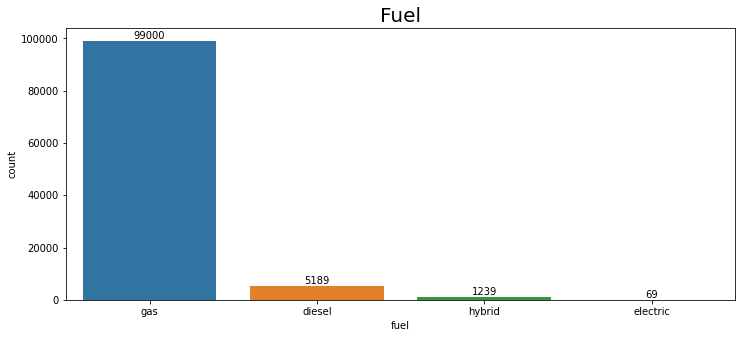

In [ ]:
plt.figure(figsize = (12,5))
transmission = sns.countplot(x ='fuel',data = df1,order = df1.fuel.value_counts().index)
plt.title('Fuel',fontsize = 20)
for p in transmission.patches:
             transmission.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

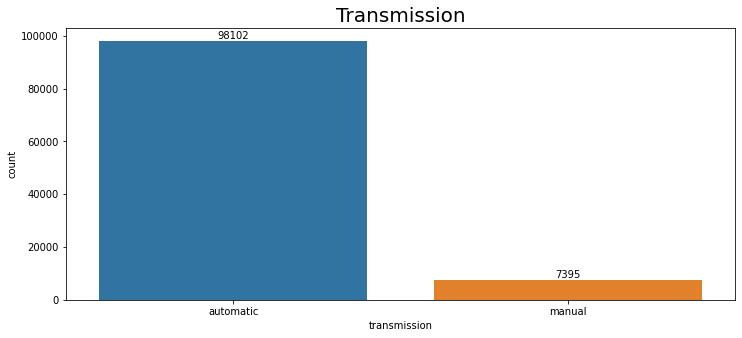

In [ ]:
plt.figure(figsize = (12,5))
transmission = sns.countplot(x ='transmission',data = df1,order = df1.transmission.value_counts().index)
plt.title('Transmission',fontsize = 20)
for p in transmission.patches:
             transmission.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

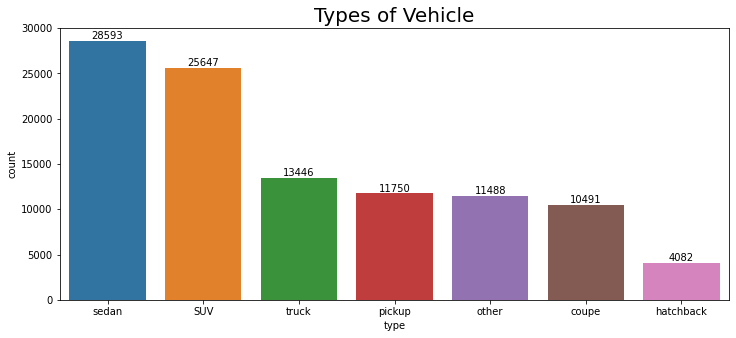

In [ ]:
plt.figure(figsize = (12,5))
types = sns.countplot(x ='type',data = df1,order=df1.type.value_counts().index)
plt.title('Types of Vehicle', fontsize = 20)
for p in types.patches:
             types.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

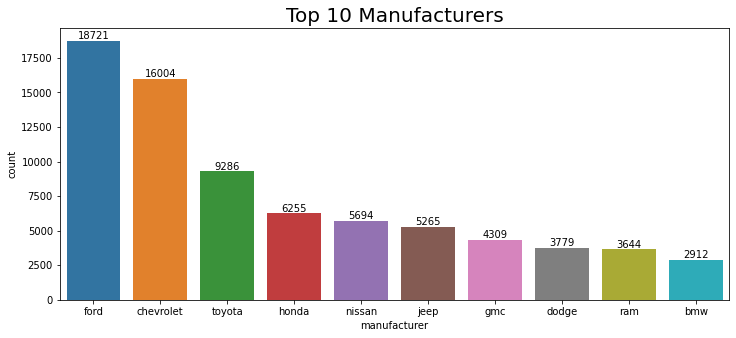

In [ ]:
plt.figure(figsize = (12,5))
manu = sns.countplot(x ='manufacturer',data = df1,order=df1.manufacturer.value_counts().iloc[:10].index)
plt.title('Top 10 Manufacturers',fontsize = 20)
for p in manu.patches:
             manu.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

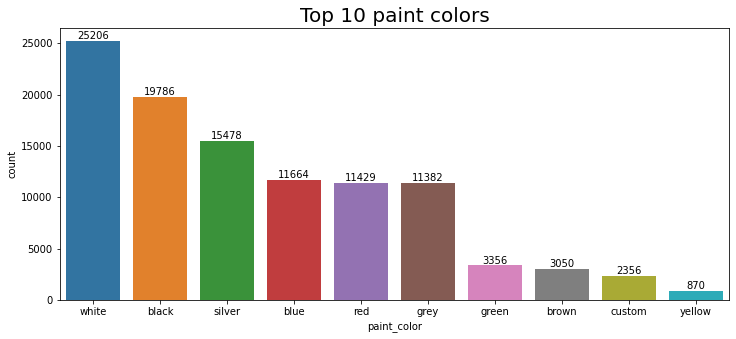

In [ ]:
plt.figure(figsize = (12,5))
paint = sns.countplot(x = "paint_color",data = df1, order = df1.paint_color.value_counts().iloc[:10].index)
plt.title('Top 10 paint colors',fontsize = 20)
for p in paint.patches:
             paint.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

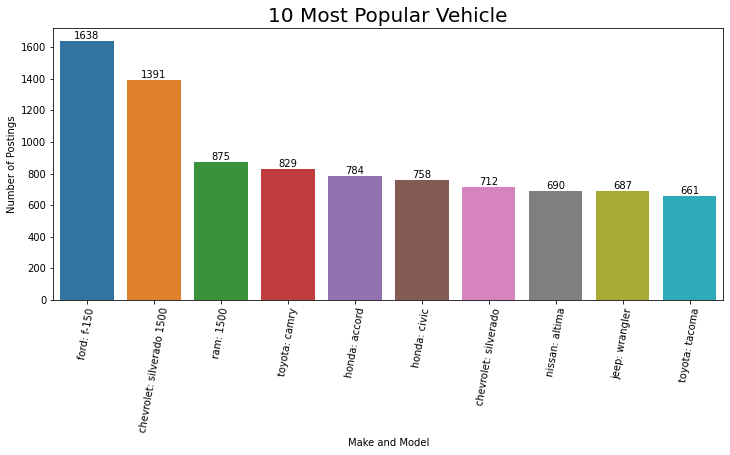

In [ ]:
df1['make_model'] = df1['manufacturer'] + ': ' + df1['model'] 
plt.figure(figsize = (12,5))
models = sns.countplot(x = "make_model",data = df1, order = df1.make_model.value_counts().iloc[:10].index)
plt.xlabel('Make and Model')
plt.ylabel('Number of Postings')
plt.title('10 Most Popular Vehicle', fontsize = 20)
plt.xticks(rotation=80)
for p in models.patches:
             models.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

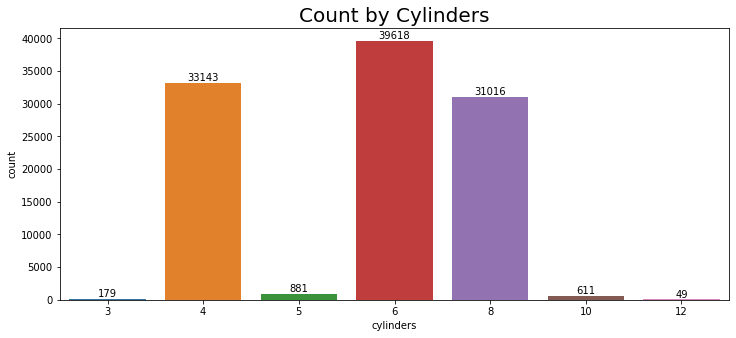

In [ ]:
plt.figure(figsize=(12,5))
cylinders = sns.countplot(data = df1, x = "cylinders")
plt.title('Count by Cylinders', fontsize = 20)
for p in cylinders.patches:
             cylinders.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

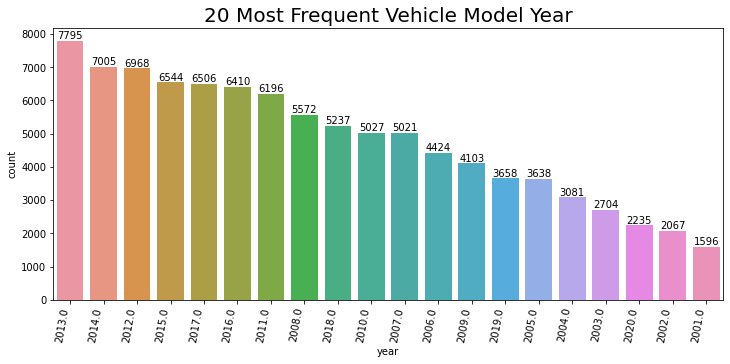

In [ ]:
plt.figure(figsize=(12,5))
year = sns.countplot(x='year',data=df1, order = df1.year.value_counts().iloc[:20].index)
year.set_xticklabels(year.get_xticklabels(), rotation=80, ha="right",fontsize=10)
plt.title('20 Most Frequent Vehicle Model Year', fontsize = 20)
for p in year.patches:
             year.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

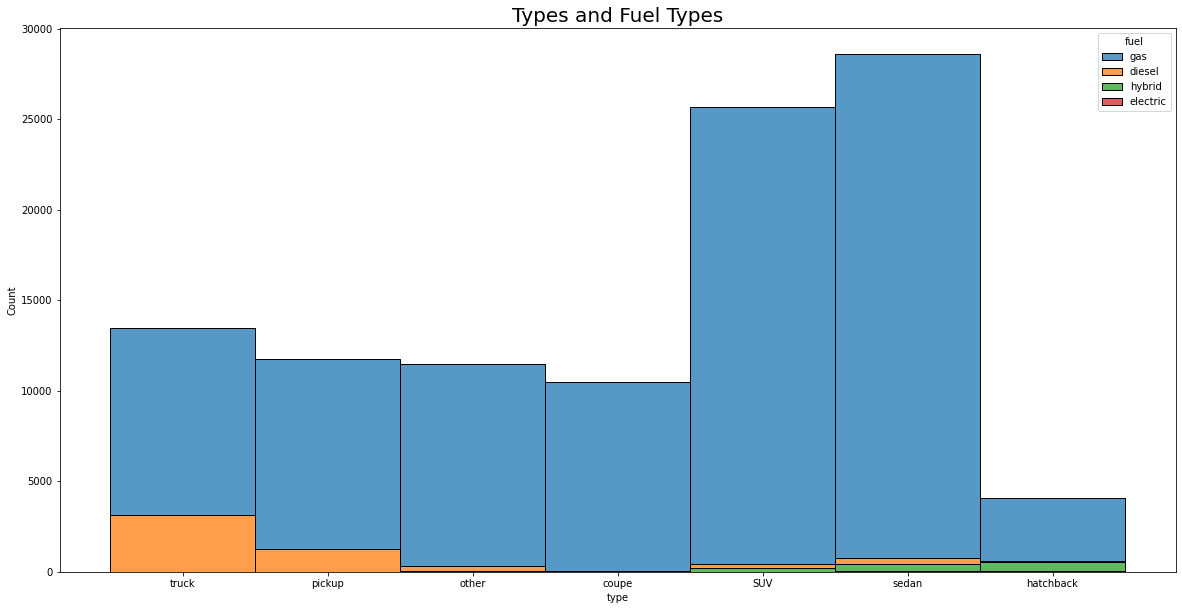

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(data=df1, x="type", hue="fuel",multiple="stack", stat="count", discrete=True)
plt.title('Types and Fuel Types',fontsize = 20)
plt.show()

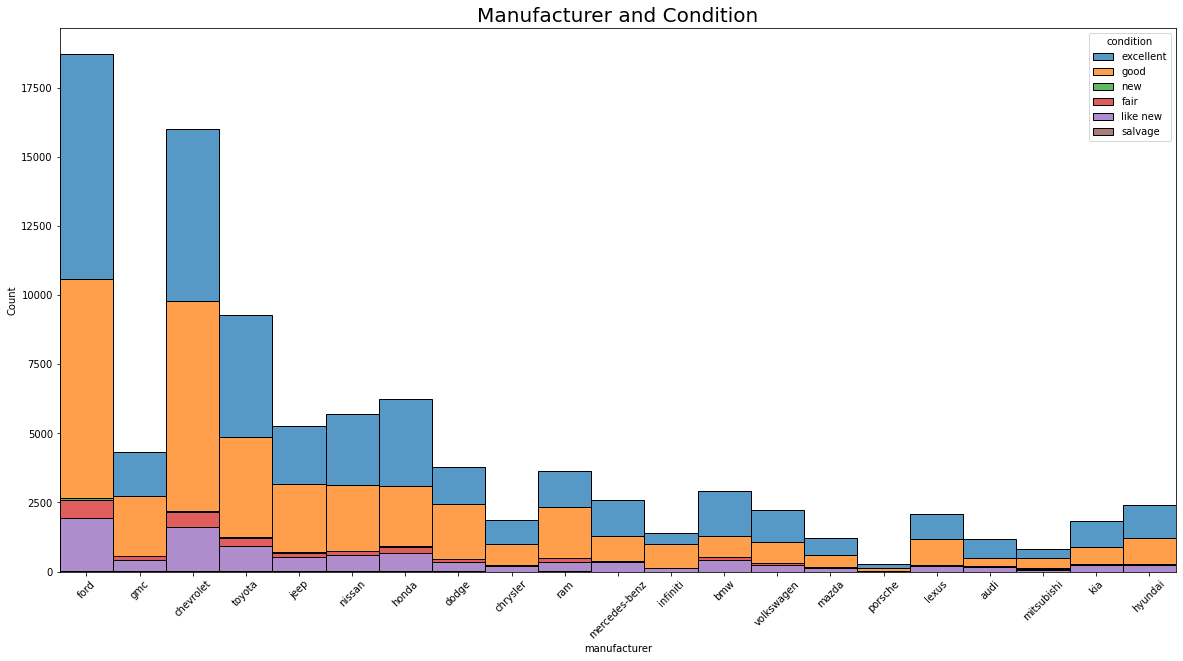

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(data=df1, x="manufacturer", hue="condition",multiple="stack", stat="count", discrete=True)
plt.xticks(rotation= 45)
plt.xlim(-0.5, 20.5)
plt.title('Manufacturer and Condition',fontsize = 20)
plt.show()

In [ ]:
df1.columns

Index(['id', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state', 'lat', 'long', 'posting_date',
       'make_model', 'age'],
      dtype='object')

Text(0.5, 1.0, 'Price Density Distribution by Drive Type (Under $50,000)')

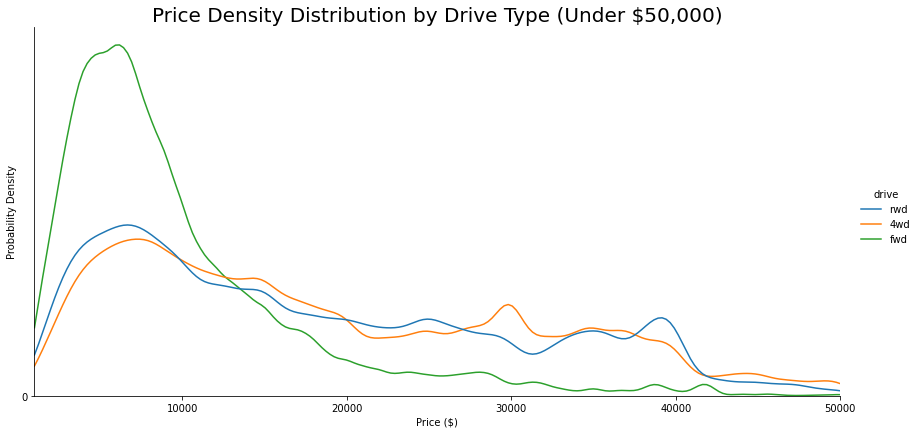

In [ ]:
sns.displot(df1, x='price', hue='drive', kind='kde', bw_adjust=0.6, cut=0, common_norm=False, height=6, aspect=2)
plt.xticks(range(0,int(1e5), int(1e4)))
plt.yticks(range(0,1))
plt.xlabel('Price ($)')
plt.xlim(1000,50000)
plt.ylabel('Probability Density')
plt.title('Price Density Distribution by Drive Type (Under $50,000)', fontsize = 20)

Text(0.5, 1.0, 'Price Density Distribution by Title status (Under $50,000)')

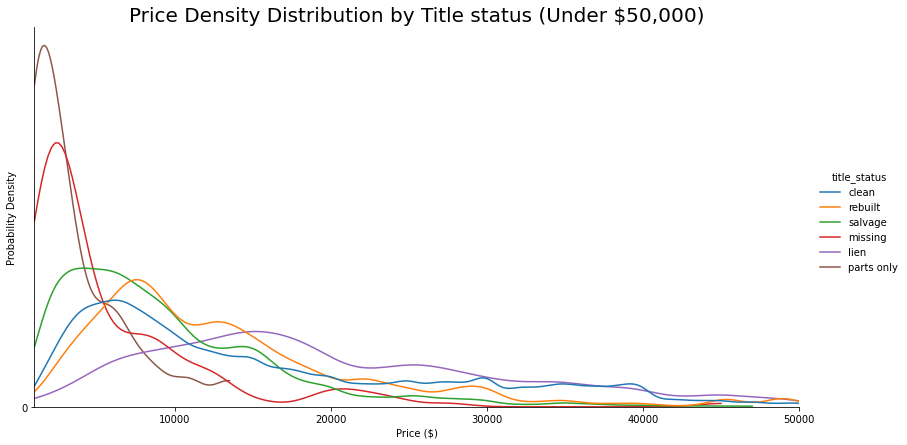

In [ ]:
sns.displot(df1, x='price', hue='title_status', kind='kde', bw_adjust=0.6, cut=0, common_norm=False, height=6, aspect=2)
plt.xticks(range(0,int(1e5), int(1e4)))
plt.yticks(range(0,1))
plt.xlabel('Price ($)')
plt.xlim(1000,50000)
plt.ylabel('Probability Density')
plt.title('Price Density Distribution by Title status (Under $50,000)', fontsize = 20)

Text(0.5, 1.0, 'Price Density Distribution by Condition (Under $50,000)')

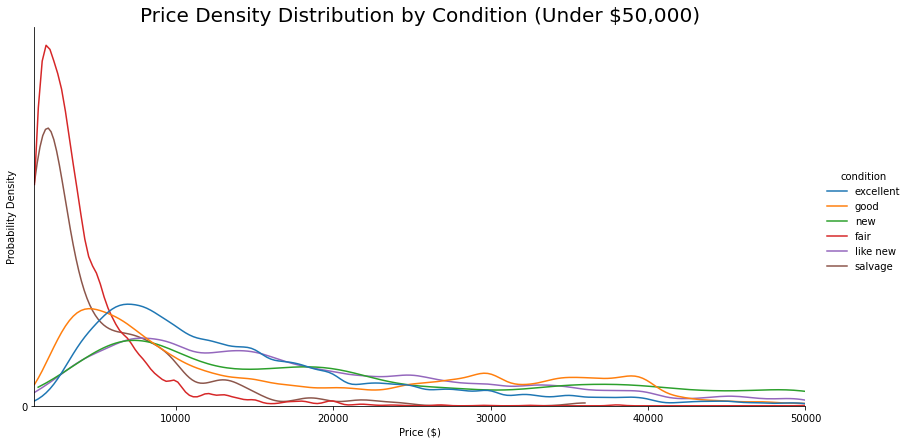

In [ ]:
sns.displot(df1, x='price', hue='condition', kind='kde', bw_adjust=0.6, cut=0, common_norm=False, height=6, aspect=2)
plt.xticks(range(0,int(1e5), int(1e4)))
plt.yticks(range(0,1))
plt.xlabel('Price ($)')
plt.xlim(1000,50000)
plt.ylabel('Probability Density')
plt.title('Price Density Distribution by Condition (Under $50,000)', fontsize = 20)

Text(0.5, 1.0, 'Price Density Distribution by Type (Under $50,000)')

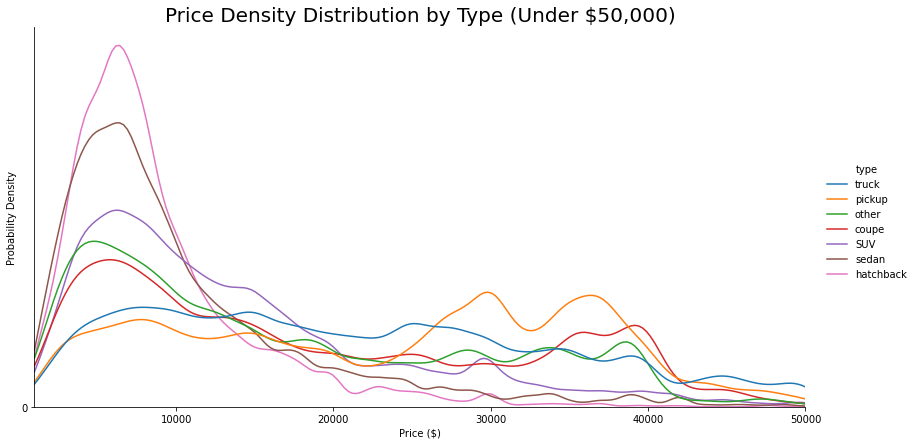

In [ ]:
sns.displot(df1, x='price', hue='type', kind='kde', bw_adjust=0.6, cut=0, common_norm=False, height=6, aspect=2)
plt.xticks(range(0,int(1e5), int(1e4)))
plt.yticks(range(0,1))
plt.xlabel('Price ($)')
plt.xlim(1000, 50000)
plt.ylabel('Probability Density')
plt.title('Price Density Distribution by Type (Under $50,000)', fontsize = 20)

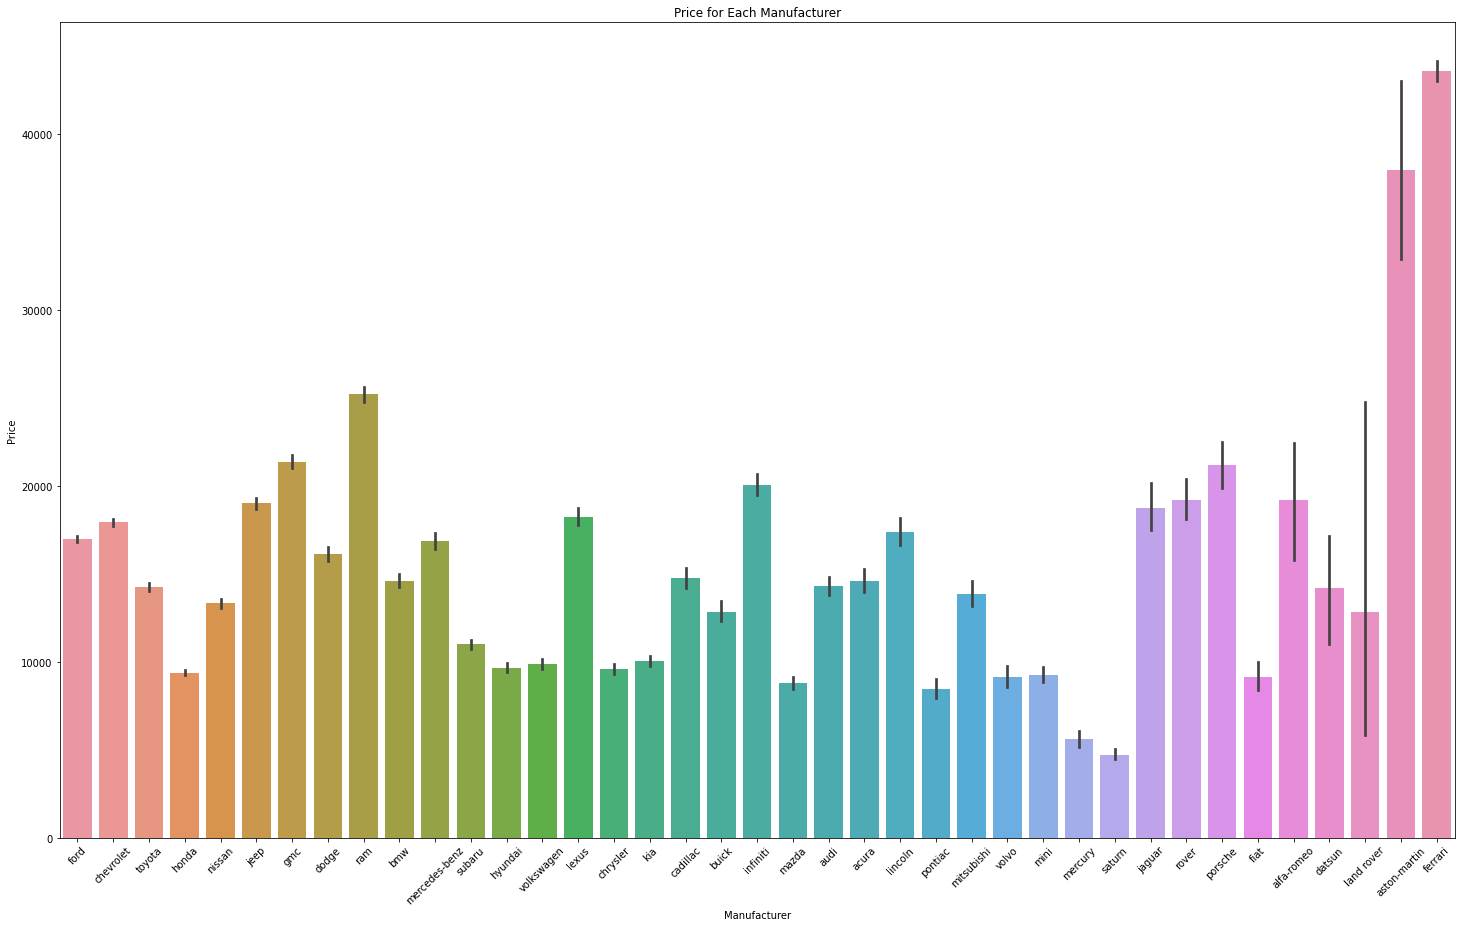

In [ ]:
plt.figure(figsize=(25,15))
sns.barplot(x=df1.manufacturer, y=df1.price, order = df1.manufacturer.value_counts().iloc[:40].index)
plt.xticks(rotation= 45)
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.title("Price for Each Manufacturer")
plt.show()

In [ ]:
cars = df1[df1["price"] >= 35000].iloc[:,15:17]
cars.rename(columns={'lat':'latitude','long':'longitude'}, inplace=True)
cars.latitude.fillna(0, inplace = True)
cars.longitude.fillna(0, inplace = True) 

CarMap=fo.Map(location=[45.5,-71],tiles = "Stamen Toner",zoom_start=4)
HeatMap(data=cars, radius=15).add_to(CarMap)
CarMap.save('index.html')
CarMap

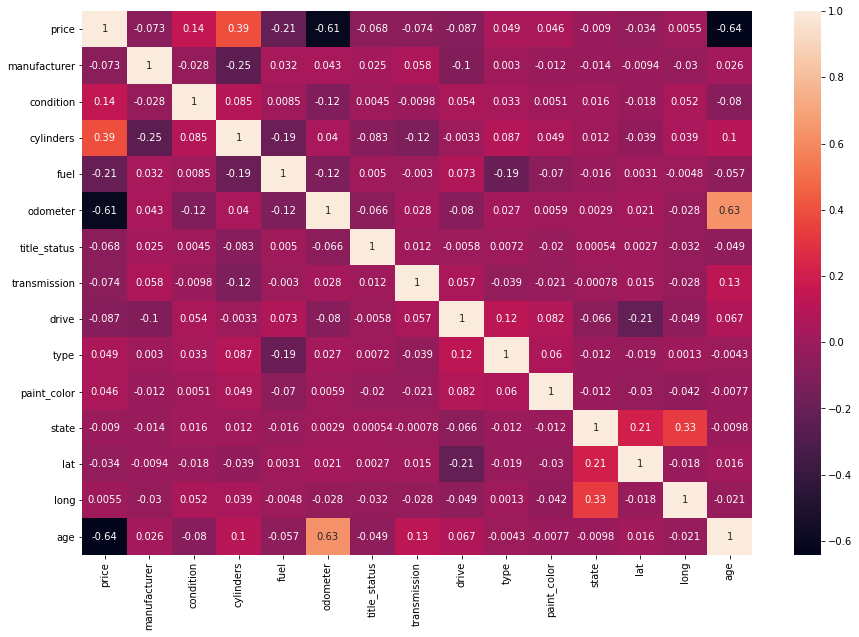

In [ ]:
cor = df2.corr()
plt.figure(figsize = (15,10))
sns.heatmap(cor, annot = True)
plt.show()

# Preprocessing for Models

In [ ]:
df1.head()

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date,make_model,age
0,7316356412,15000,2013.00000,ford,f-150 xlt,excellent,6,gas,128000.00000,clean,automatic,rwd,truck,black,al,32.59200,-85.51890,2021-05-03T14:02:03-0500,ford: f-150 xlt,8.00000
1,7316343444,27990,2012.00000,gmc,sierra 2500 hd extended cab,good,8,gas,68696.00000,clean,automatic,4wd,pickup,black,al,32.59000,-85.48000,2021-05-03T13:41:25-0500,gmc: sierra 2500 hd extended cab,9.00000
2,7316304717,34590,2016.00000,chevrolet,silverado 1500 double,good,6,gas,29499.00000,clean,automatic,4wd,pickup,silver,al,32.59000,-85.48000,2021-05-03T12:41:33-0500,chevrolet: silverado 1500 double,5.00000
3,7316285779,35000,2019.00000,toyota,tacoma,excellent,6,gas,43000.00000,clean,automatic,4wd,truck,grey,al,32.60130,-85.44397,2021-05-03T12:12:59-0500,toyota: tacoma,2.00000
4,7316257769,29990,2016.00000,chevrolet,colorado extended cab,good,6,gas,17302.00000,clean,automatic,4wd,pickup,red,al,32.59000,-85.48000,2021-05-03T11:31:14-0500,chevrolet: colorado extended cab,5.00000


In [ ]:
#df2.to_csv (r'/Users/huangzexi830/Desktop/uci msba/212A/FInal Project/UsedVehicleSearch-master/newvehiclesv2.csv', index = False, header=True)

In [ ]:
df_m = df1.copy()

In [ ]:
cats = ["manufacturer","condition","fuel","title_status","transmission", "drive", "type", "paint_color", "state"]

In [ ]:
for i in cats:
    df_m[i] = df_m[i].astype('category')
    df_m[i] = df_m[i].cat.codes

In [ ]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105497 entries, 0 to 105788
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            105497 non-null  int64  
 1   price         105497 non-null  int64  
 2   year          105497 non-null  float64
 3   manufacturer  105497 non-null  int8   
 4   model         105497 non-null  object 
 5   condition     105497 non-null  int8   
 6   cylinders     105497 non-null  int64  
 7   fuel          105497 non-null  int8   
 8   odometer      105497 non-null  float64
 9   title_status  105497 non-null  int8   
 10  transmission  105497 non-null  int8   
 11  drive         105497 non-null  int8   
 12  type          105497 non-null  int8   
 13  paint_color   105497 non-null  int8   
 14  state         105497 non-null  int8   
 15  lat           105497 non-null  float64
 16  long          105497 non-null  float64
 17  posting_date  105497 non-null  object 
 18  make

In [ ]:
numerics = ['int8','float64', 'int64']
df2 = pd.DataFrame()
attributes = df_m.columns.values.tolist()
for i in attributes:
    if df_m[i].dtype in numerics: 
        df2[i] = df_m[i]

In [ ]:
df2 = df2[df2['price']<=50000]
df2 = df2[df2['year'] >= 2000]

In [ ]:
df2 = df2.drop(columns = "id")
df2 = df2.drop(columns = "year")

In [ ]:
label_encoder = LabelEncoder()
odo = label_encoder.fit_transform(pd.cut(df2['odometer'], 100, retbins=True)[0])
df2['odometer'] = odo.tolist()

In [ ]:
# Set up for discrete targets
n_bins = 10
X = df2.iloc[:,1:17]
Y = label_encoder.fit_transform(pd.cut(df2['price'], n_bins, retbins=True)[0])
X_train, X_test, y_train,y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
#Set up for continuous targets
X2 = df2.iloc[:,1:17]
Y2 = df1.loc[(df1['year'] >= 2000) & (df1['price'] <= 50000)].iloc[:,1]
X_train2, X_test2, y_train2,y_test2 = train_test_split(X2, Y2, test_size=0.3, random_state=2)

In [ ]:
X.shape

(97151, 14)

In [ ]:
X_train.shape

(68005, 14)

### Feature Selection

Observations: location where cars been listed has good impact on listing price
              Odometer and age are top two factors of listing price
              Transmission is not as important, because over 90% cars listed are automatic
              Fuel is not important, because most cars are gas car

In [ ]:
FS = sklearn.ensemble.RandomForestClassifier(n_estimators=100)
FS.fit(X,Y)

RandomForestClassifier()

Text(0.5, 1.0, 'Feature Importance')

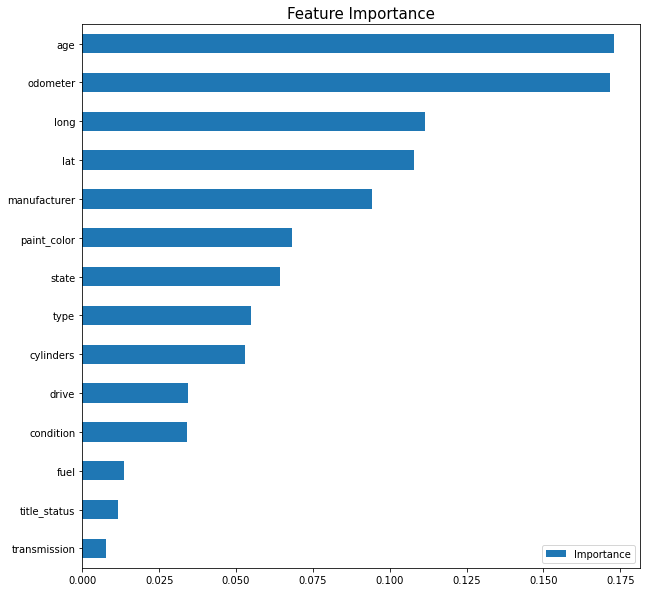

In [ ]:
importance = FS.feature_importances_
importance = pd.DataFrame(importance, index=X.columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(10,10))
plt.title("Feature Importance", fontsize = 15)

# Models with discreted targets

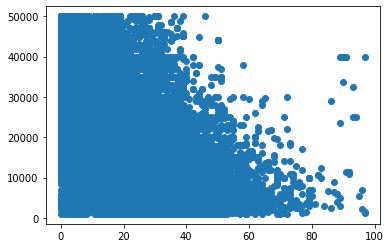

In [ ]:
x_s = X2['odometer']
plt.scatter(x_s,Y2)

### Decision Tree

In [ ]:
decisionTree = sklearn.tree.DecisionTreeClassifier(max_depth=25)
decisionTree.fit(X_train, y_train)
score_tree = sklearn.model_selection.cross_val_score(decisionTree, X_train, y_train, cv=10)

In [ ]:
print(round(r2_score(y_test, decisionTree.predict(X_test))*100,3))
print(confusion_matrix(y_test, decisionTree.predict(X_test)))
print(classification_report(y_test, decisionTree.predict(X_test)))
print(score_tree)
print('Avg CV value', score_tree.mean())

84.132
[[4297 1326  203   45   19   11    1    6    1    0]
 [1197 4750 1018  216   66   19    3    4    1    0]
 [ 216  863 2664  509  124   55    9   10    3    1]
 [  59  183  501 1707  304  121   48   23    5    5]
 [  20   57  129  280 1208  153   57   31   15    7]
 [  12   20   58  123  150 1611   97   74   22   14]
 [  11    7   16   35   57  134 1235   92   40   11]
 [   2    2    6   21   32   66   96 1542   44   37]
 [   2    3    4    7    9   20   32   75  372   25]
 [   0    1    2    2    3   12   27   34   29  270]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73      5909
           1       0.66      0.65      0.66      7274
           2       0.58      0.60      0.59      4454
           3       0.58      0.58      0.58      2956
           4       0.61      0.62      0.61      1957
           5       0.73      0.74      0.74      2181
           6       0.77      0.75      0.76      1638
           7       0.82      

### Random Forest Classifier

In [ ]:
forest = sklearn.ensemble.RandomForestClassifier(n_estimators=150)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=150)

In [ ]:
score_forest = sklearn.model_selection.cross_val_score(forest, X_train, y_train, cv=10)
print(score_forest)
print('Avg CV value', score_forest.mean())

[0.73797971 0.74474342 0.74121453 0.73195118 0.74180268 0.74102941
 0.73426471 0.74073529 0.72955882 0.73441176]
Avg CV value 0.7377691515953537


In [ ]:
print(round(r2_score(y_test, forest.predict(X_test))*100,2))
print(confusion_matrix(y_test, forest.predict(X_test)))
print(classification_report(y_test, forest.predict(X_test)))

90.03
[[4711 1091   66   22    9    5    2    2    1    0]
 [ 895 5643  651   74    5    5    1    0    0    0]
 [  72 1031 2894  396   43    9    4    5    0    0]
 [  20  171  596 1900  174   78   12    5    0    0]
 [   3   44  139  348 1223  142   37   16    2    3]
 [   4   12   44  129  141 1708   79   57    6    1]
 [   2    2   18   38   51  126 1284   98   14    5]
 [   0    2    6   15   34   54   97 1597   22   21]
 [   1    0    1   10   12   22   29   94  358   22]
 [   0    2    1    0    4   12   22   54   10  275]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      5909
           1       0.71      0.78      0.74      7274
           2       0.66      0.65      0.65      4454
           3       0.65      0.64      0.65      2956
           4       0.72      0.62      0.67      1957
           5       0.79      0.78      0.79      2181
           6       0.82      0.78      0.80      1638
           7       0.83      0

### Naive Bayes Classifier

In [ ]:
NB = GaussianNB()
NB.fit(X_train, y_train)
print(r2_score(y_test, NB.predict(X_test)))

0.5426745572024883


# Models with continuous targets

### LinearRegression (Benchmark Model)

In [ ]:
reg = LinearRegression()
reg.fit(X_train2, y_train2)
print("R2 score for this model is", round(r2_score(y_test2, reg.predict(X_test2))*100,3))
print("Mean Squared Error for this model is" ,mean_squared_error(y_test2, reg.predict(X_test2))**0.5)

R2 score for this model is 74.308
Mean Squared Error for this model is 5959.514546249572


In [ ]:
score_reg = sklearn.model_selection.cross_val_score(reg, X_train2, y_train2, cv=10)
print(score_reg)
print(score_reg.mean())

[0.74080898 0.74092828 0.74115763 0.73415943 0.74835535 0.74637768
 0.73776779 0.72911424 0.74573048 0.73997899]
0.7404378845735843


### Descision Tree Regression

In [ ]:
DTR = DecisionTreeRegressor(max_depth=25)
DTR.fit(X_train2, y_train2)
print(round(r2_score(y_test2, DTR.predict(X_test2))*100,3))
print(mean_squared_error(y_test2, DTR.predict(X_test2))**0.5)

86.091
4384.8592766114525


In [ ]:
score_DTR = sklearn.model_selection.cross_val_score(DTR, X_train2, y_train2, cv=10)
print(score_DTR.mean())

0.8527034869023609


### RandomForestRegressor (Best Model)

In [ ]:
RFR = RandomForestRegressor(n_estimators=150, random_state=2)
RFR.fit(X_train2, y_train2)

RandomForestRegressor(n_estimators=150, random_state=2)

In [ ]:
print(round(r2_score(y_test2, RFR.predict(X_test2))*100, 3))
print(mean_squared_error(y_test2, RFR.predict(X_test2))**0.5)

93.082
3092.4508356191377


In [ ]:
score_RFR = sklearn.model_selection.cross_val_score(RFR, X_train2, y_train2, cv=10)
print(score_RFR)

[0.92459679 0.92556812 0.92288336 0.92382443 0.92557237 0.92224508
 0.92351837 0.91963034 0.92781534 0.92582834]


In [ ]:
print(score_RFR.mean())

0.9241482550824213


<AxesSubplot:title={'center':'Cross-Validation Score'}>

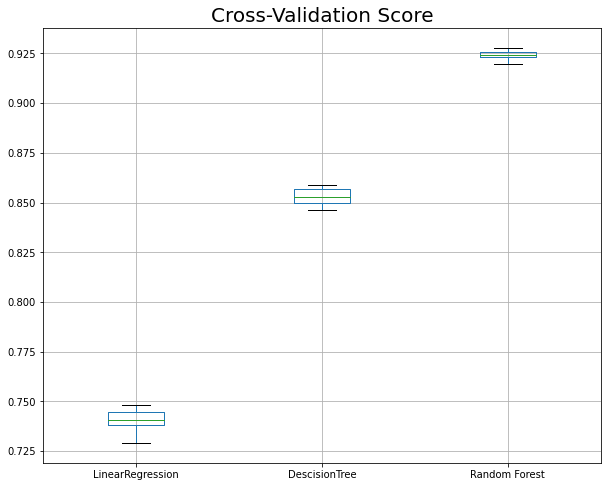

In [ ]:
plt.figure(figsize=(10,8))
dfBox = pd.DataFrame(data = list(zip(score_reg, score_DTR, score_RFR)), columns = ['LinearRegression','DescisionTree','Random Forest'])
plt.title('Cross-Validation Score', fontsize = 20)
dfBox.boxplot()